# Emotion Detection_Model


**Importing important Libraries** 

In [1]:
import matplotlib.pyplot as plt 
from glob import glob 
## glob is to create a list of all the files present in a directory
import cv2
# to read the images or to perform few actions on images 
import random 
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator is the form of data from the datasets so that our ML Model understand it 
from tensorflow.keras.layers import Dense , Input , Dropout , Flatten , Conv2D
# Here Dense is the normal it is like a linear function , 
# Input is the function where we decide the input size , 
# dropout is used for because ML Model not only works on the training data set but also works in the new Photos , Images etc .   
# Flatten is used to changes the matrix into several Dimensional Arrays like 1D,2D,etc ..
# Concolutional 2D is a Convolutional layer like we create convolutional layers to read the Pictures , images and learn future from it.
from tensorflow.keras.layers import BatchNormalization , Activation , MaxPooling2D
# Here BatchNormalization does the normalization over the batch of data
# Activation function is like the values of that everything that are using activation function so that it does's become only a linear model
# MaxPoolong2D is the filter where it marks , it changes the dimension of the image so that as we increase the convolutional layers the data to be processed should not be increased .   
from tensorflow.keras.models import Model, Sequential
# Here Model is to create , to define a tensorflow model and Sequential is a type of tensorformer model will be using . 
from tensorflow.keras.optimizers import Adam
# Here Adam is a type of optimizer which is used in Tensorflow 
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau
# ModelCheckpoint is to store the each and every data point of the iteration while training the model and LROnPlateau is a function where we decrease the learning rate as there is little difference or no difference in the learning rate at the end of the training data    
from tensorflow.keras.utils import plot_model
# plot_model is used to training lossess and all those things using matplotlib  
from IPython.display import SVG , Image
# SVG , Image is used to import or display the images on the jupyter notebook 
import tensorflow as tf
print("Tensorfloe Version : " , tf.__version__)



C:\Java\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tensorfloe Version :  2.16.1


**Exploring DataSet**

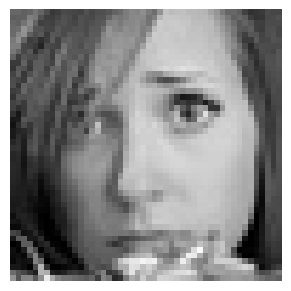

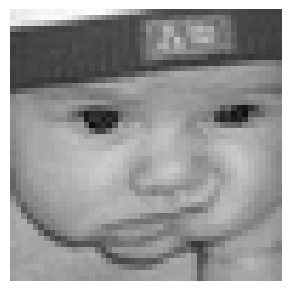

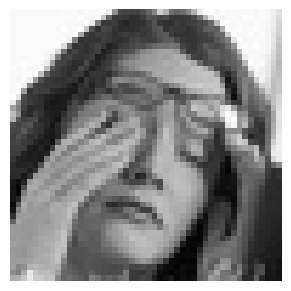

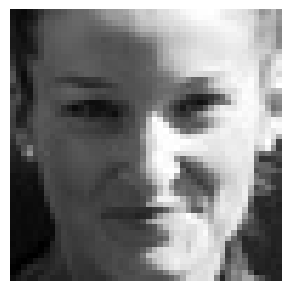

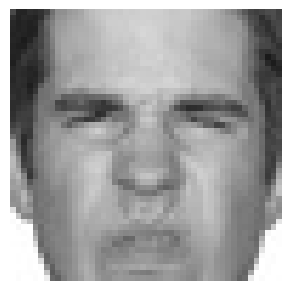

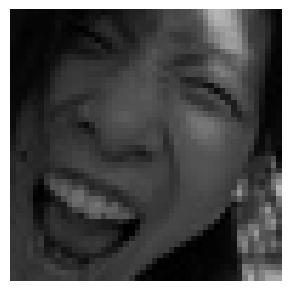

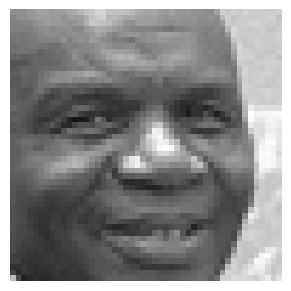

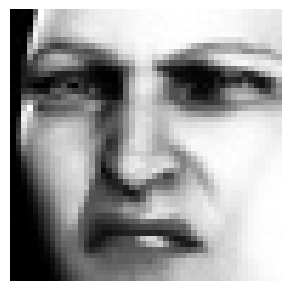

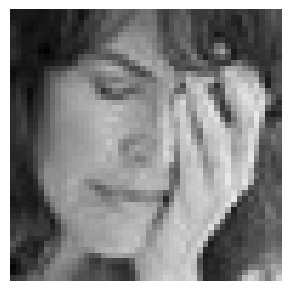

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));
    plt.axis('off')
    

Preparing Data for Training 

In [10]:
img_size = 48
# Means all the images presents in the data set are 43 pixels 
batch_size = 64
# hyperparameter
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

# img_size = 43
# batch_size = 64
data_gen_validation = ImageDataGenerator()
validation_generator  = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**


In [11]:
def Convolution(input_tensor,filters,kernel_size):
    x = Conv2D(filters=filters , kernel_size=kernel_size,padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    
    return x 

In [12]:
def Dense_f(input_tensor , nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [13]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs , 32,(3,3))
    conv_2 = Convolution(inputs , 64,(5,5))
    conv_3 = Convolution(inputs , 128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    output = Dense(7,activation="softmax")(dense_1)
    model = Model(inputs = [inputs] , outputs = [output])
    model.compile(loss = ['categorical_crossentropy'],optimizer = 'adam' , metrics = ['accuracy'])
    
    return model 

In [14]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

**Initializing the Model**

In [15]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint('model_weights.weights.h5', monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

**Training the Model**

**The next cell takes time to complete**

In [16]:
# history = model.fit(
# x = train_generator,
# steps_per_epoch=steps_per_epoch,
# epochs=epochs,
# validation_data=validation_generator,
# validation_steps=validation_steps,
# callbacks=callbacks)
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0001)

callbacks = [checkpoint, reduce_learning_rate]
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Epoch 1/15


C:\Java\Anaconda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.3331 - loss: 1.7915
Epoch 1: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 168s 371ms/step - accuracy: 0.3332 - loss: 1.7912 - val_accuracy: 0.2586 - val_loss: 1.8117 - learning_rate: 0.0010
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:48 377ms/step - accuracy: 0.3281 - loss: 1.7725
Epoch 2: saving model to model.weights.h5


C:\Java\Anaconda\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3281 - loss: 1.7725 - val_accuracy: 0.3000 - val_loss: 1.5677 - learning_rate: 0.0010
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.4913 - loss: 1.3430
Epoch 3: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 164s 364ms/step - accuracy: 0.4913 - loss: 1.3430 - val_accuracy: 0.3447 - val_loss: 1.6376 - learning_rate: 0.0010
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:43 366ms/step - accuracy: 0.4688 - loss: 1.2455
Epoch 4: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4688 - loss: 1.2455 - val_accuracy: 0.4000 - val_loss: 1.7431 - learning_rate: 0.0010
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.5875 - loss: 1.1255
Epoch 5: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 159s 354ms/step - accuracy: 0.5875 - loss: 1.1255 - val_accuracy: 0.4990 - val_loss: 1.3225 - learning_rate: 1.0000e-04
Epoch 6/15
  1/448 ━━━━━━━━━━━━━

**Model Evaluate**

In [17]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5260 - loss: 1.3432


[1.3387272357940674, 0.5174143314361572]

**Plotting Loss**

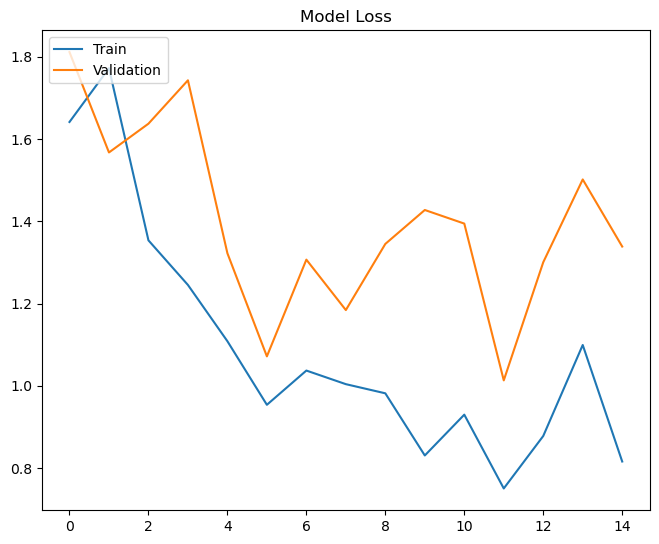

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top = 1.0 , bottom = 0.0,right = 0.95  , left = 0.0 , hspace = 0.25,wspace = 0.35)

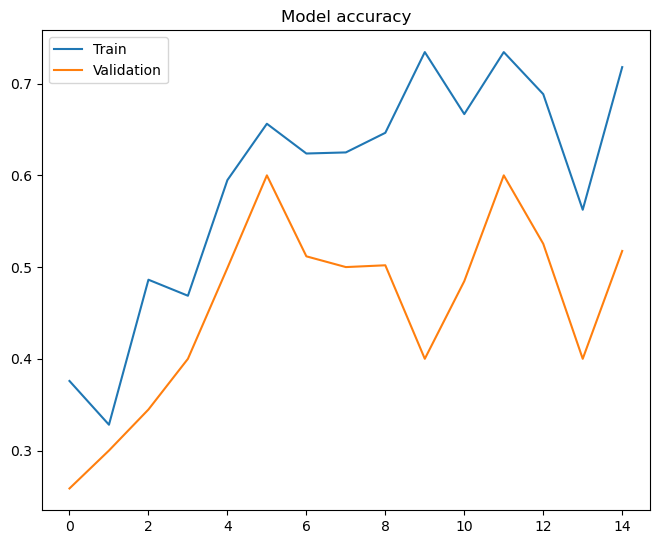

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top = 1.0 , bottom = 0.0,right = 0.95  , left = 0.0 , hspace = 0.25,wspace = 0.35)

**Saving Model**

In [26]:
model_json = model.to_json()
with open("model_a.json",'w') as json_file:
    json_file.write(model_json)